# Intelligent Agents: Reflex-Based Agents for the Vacuum-cleaner World

Student Name: [Add your name]

I have used the following AI tools: [list tools]

I understand that my submission needs to be my own work: [your initials]

## Learning Outcomes

* Design and build a simulation environment that models sensor inputs, actuator effects, and performance measurement.
* Apply core AI concepts by implementing the agent function for a simple and model-based reflex agents that respond to environmental percepts.
* Practice how the environment and the agent function interact.
* Analyze agent performance through controlled experiments across different environment configurations.
* Graduate Students: Develop strategies for handling uncertainty and imperfect information in autonomous agent systems.

## Instructions

Total Points: Undergrads 98 + 5 bonus / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a HTML file. 

### AI Use

Here are some guidelines that will make it easier for you:

* __Don't:__ Rely on AI auto completion. You will waste a lot of time trying to figure out how the suggested code relates to what we do in class. Turn off AI code completion (e.g., Copilot) in your IDE.
* __Don't:__ Do not submit code/text that you do not understand or have not checked to make sure that it is complete and correct.
* __Do:__ Use AI for debugging and letting it explain code and concepts from class.

### Using Visual Studio Code

If you use VS code then you can use `Export` (click on `...` in the menu bar) to save your notebook as a HTML file. Note that you have to run all blocks before so the HTML file contains your output.

### Using Google Colab

In Colab you need to save the notebook on GoogleDrive to work with it. For this you need to mount your google dive and change to the correct directory by uncommenting the following lines and running the code block.

In [1]:
# from google.colab import drive
# import os
#
# drive.mount('/content/drive')
# os.chdir('/content/drive/My Drive/Colab Notebooks/')

Once you are done with the assignment and have run all code blocks using `Runtime/Run all`, you can convert the file on your GoogleDrive into HTML be uncommenting the following line and running the block.

In [2]:
# %jupyter nbconvert --to html Copy\ of\ robot_vacuum.ipynb

You may have to fix the file location or the file name to match how it looks on your GoogleDrive. You can navigate in Colab to your GoogleDrive using the little folder symbol in the navigation bar to the left.

## Introduction

In this assignment you will implement a simulator environment for an automatic vacuum cleaner robot, a set of different reflex-based agent programs, and perform a comparison study for cleaning a single room. Focus on the __cleaning phase__ which starts when the robot is activated and ends when the last dirty square in the room has been cleaned. Someone else will take care of the agent program needed to navigate back to the charging station after the room is clean.

## PEAS description of the cleaning phase

__Performance Measure:__ Each action costs 1 energy unit. The performance is measured as the sum of the energy units used to clean the whole room.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size and the layout of the room (i.e., it knows $n$). To start, the agent is placed on a random square.

__Actuators:__ The agent can clean the current square (action `suck`) or move to an adjacent square by going `north`, `east`, `south`, or `west`.

__Sensors:__ Four bumper sensors, one for north, east, south, and west; a dirt sensor reporting dirt in the current square.  


## The agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictionary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`. E.g., if the agent is on the north-west corner, `bumpers` will be `{"north" : True, "east" : False, "south" : False, "west" : True}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [3]:
# make sure numpy is installed
%pip install -q numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import numpy as np

actions = ["north", "east", "west", "south", "suck"]

def simple_randomized_agent(bumpers, dirty):
    return np.random.choice(actions)

In [5]:
# define percepts (current location is NW corner and it is dirty)
bumpers = {"north" : True, "east" : False, "south" : False, "west" : True}
dirty = True

# call agent program function with percepts and it returns an action
simple_randomized_agent(bumpers, dirty)

'east'

__Note:__ This is not a rational intelligent agent. It ignores its sensors and may bump into a wall repeatedly or not clean a dirty square. You will be asked to implement rational agents below.

## Simple environment example

We implement a simple simulation environment that supplies the agent with its percepts.
The simple environment is infinite in size (bumpers are always `False`) and every square is always dirty, even if the agent cleans it. The environment function returns a different performance measure than the one specified in the PEAS description! Since the room is infinite and all squares are constantly dirty, the agent can never clean the whole room. Your implementation needs to implement the **correct performance measure.** The energy budget of the agent is specified as `max_steps`. 

In [6]:
def simple_environment(agent_function, max_steps, verbose = True):
    num_cleaned = 0
    
    for i in range(max_steps):
        dirty = True
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

        action = agent_function(bumpers, dirty)
        if (verbose): print("step", i , "- action:", action) 
        
        if (action == "suck"): 
            num_cleaned = num_cleaned + 1
        
    return num_cleaned
        


Do one simulation run with a simple randomized agent that has enough energy for 20 steps.

In [7]:
simple_environment(simple_randomized_agent, max_steps = 20)

step 0 - action: north
step 1 - action: east
step 2 - action: west
step 3 - action: suck
step 4 - action: south
step 5 - action: east
step 6 - action: suck
step 7 - action: west
step 8 - action: suck
step 9 - action: south
step 10 - action: south
step 11 - action: north
step 12 - action: north
step 13 - action: west
step 14 - action: west
step 15 - action: west
step 16 - action: east
step 17 - action: north
step 18 - action: east
step 19 - action: east


3

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. 
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formatted professionally. 
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your submitted file is readable and contains all figures.
4. Document your code. Use comments in the code and add a discussion of how your implementation works and your design choices.


## Task 1: Implement a simulation environment [20 Points]

The simple environment above is not very realistic. Your environment simulator needs to follow the PEAS description from above. It needs to:

* Initialize the environment by storing the state of each square (clean/dirty) and making some dirty. ([Help with random numbers and arrays in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/random_numbers_and_arrays.ipynb))
* Keep track of the agent's position.
* Call the agent function repeatedly and provide the agent function with the sensor inputs.  
* React to the agent's actions. E.g, by removing dirt from a square or moving the agent around unless there is a wall in the way.
* Keep track of the performance measure. That is, track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop until all squares are clean or a predefined number of steps have been reached (i.e., the robot runs out of energy).

The simulation environment should be a function like the `simple_environment()` and needs to work with the simple randomized agent program from above. **Use the same environment for all your agent implementations in the tasks below.**

*Note on debugging:* Debugging is difficult. Make sure your environment prints enough information when you use `verbose = True`. Also, implementing a function that the environment can use to displays the room with dirt and the current position of the robot at every step is very useful.  

In [8]:
import numpy as np
import random

def vacuum_environment(agent_function, room_size=5, dirt_probability=0.2, max_steps=1000, verbose=False):
    """
    PEAS robot vacuum cleaner simulation environment
    Args:
        agent_function: agent function receive (bumpers , dirty) and return action
        room_size : size of the room (default 5 x 5 )
        dirt_probability : probability of cell containing dust (default 0.2)
        max_steps : robot energy (default 1000)
        verbose : show info debug (default False) 
    Returns:
        performance_measure: Number of steps required to clean an entire room
    """
    
    # initalize  the environment
    # True = dirty, False = clean
    room = np.random.random((room_size, room_size)) < dirt_probability
    
    # Random initial position
    agent_x = random.randint(0, room_size - 1)
    agent_y = random.randint(0, room_size - 1)
    
    steps = 0
    
    if verbose:
        print(f"The room {room_size}x{room_size}, initial position: ({agent_x}, {agent_y})")
        print("Initial room status:")
        print_room(room, agent_x, agent_y)
    
    # Loops
    while steps < max_steps:
        # Check if the room is dirty
        if not np.any(room):
            if verbose:
                print(f"Finish! Cleaned the entire back room {steps} step.")
            return steps
        
        # Creating percepts for the agent (create bumpers (vật cản))
        bumpers = {
            "north": agent_y == 0,  
            "south": agent_y == room_size - 1,  
            "west": agent_x == 0,  
            "east": agent_x == room_size - 1 
        }
        
        dirty = room[agent_y, agent_x]  # There is dust in the current location
        
        # Call agent function
        action = agent_function(bumpers, dirty)
        
        if verbose:
            print(f"Step {steps}: Position ({agent_x}, {agent_y}), dirty: {dirty}, action: {action}")
        
      
        if action == "suck":
            room[agent_y, agent_x] = False  
            if verbose:
                print(f"  -> Cleaned the cell ({agent_x}, {agent_y})")
                
        elif action == "north" and not bumpers["north"]:
            agent_y -= 1
            if verbose:
                print(f"  -> Moving North: ({agent_x}, {agent_y})")
                
        elif action == "south" and not bumpers["south"]:
            agent_y += 1
            if verbose:
                print(f"  -> Moving South: ({agent_x}, {agent_y})")
                
        elif action == "west" and not bumpers["west"]:
            agent_x -= 1
            if verbose:
                print(f"  -> Moving West: ({agent_x}, {agent_y})")
                
        elif action == "east" and not bumpers["east"]:
            agent_x += 1
            if verbose:
                print(f"  -> Moving East: ({agent_x}, {agent_y})")
        
        else:
            if verbose:
                print(f"  -> Invalid action or hitting a wall: {action}")
        
        steps += 1
    
    if verbose:
        print(f"Out of energy after {steps} steps. {np.sum(room)} dirty cells left.")
    
    return steps

def print_room(room, agent_x, agent_y):
    """Print room status with robot location"""
    for y in range(room.shape[0]):
        row = ""
        for x in range(room.shape[1]):
            if x == agent_x and y == agent_y: # Robot initialization position
                if room[y, x]: 
                    row += "R*"   # Robot + dirty
                else:
                    row += "R "   # Robot + clean
            else: # other location
                if room[y, x]:
                    row += "* "  # dirty
                else:
                    row += ". "  # clean
        print(row)
    print()
    

Show that your environment works with the simple randomized agent from above.

In [9]:
# Test môi trường với tác tử ngẫu nhiên đơn giản

print("=== Test 1: Chạy một lần với verbose = True ===")
performance1 = vacuum_environment(simple_randomized_agent, room_size=5, verbose=True)
print(f"Hiệu suất: {performance1} bước\n")

print("=== Test 2: Chạy 10 lần để có kết quả trung bình ===")
results = []
for i in range(10):
    perf = vacuum_environment(simple_randomized_agent, room_size=5, verbose=False)
    results.append(perf)
    print(f"Lần {i+1}: {perf} bước")

print(f"\nKết quả thống kê:")
print(f"- Hiệu suất trung bình: {np.mean(results):.2f} bước")
print(f"- Hiệu suất tốt nhất: {min(results)} bước")
print(f"- Hiệu suất tệ nhất: {max(results)} bước")
print(f"- Độ lệch chuẩn: {np.std(results):.2f} bước")

print("\n=== Test 3: Test với phòng nhỏ hơn (3x3) ===")
small_room_results = []
for i in range(5):
    perf = vacuum_environment(simple_randomized_agent, room_size=3, verbose=False)
    small_room_results.append(perf)
    print(f"Lần {i+1}: {perf} bước")

print(f"\nPhòng 3x3 - Hiệu suất trung bình: {np.mean(small_room_results):.2f} bước")

=== Test 1: Chạy một lần với verbose = True ===
The room 5x5, initial position: (0, 0)
Initial room status:
R*. . . . 
. . * . * 
. . . . * 
. * . * * 
. . . . . 

Step 0: Position (0, 0), dirty: True, action: north
  -> Invalid action or hitting a wall: north
Step 1: Position (0, 0), dirty: True, action: suck
  -> Cleaned the cell (0, 0)
Step 2: Position (0, 0), dirty: False, action: south
  -> Moving South: (0, 1)
Step 3: Position (0, 1), dirty: False, action: west
  -> Invalid action or hitting a wall: west
Step 4: Position (0, 1), dirty: False, action: north
  -> Moving North: (0, 0)
Step 5: Position (0, 0), dirty: False, action: south
  -> Moving South: (0, 1)
Step 6: Position (0, 1), dirty: False, action: south
  -> Moving South: (0, 2)
Step 7: Position (0, 2), dirty: False, action: south
  -> Moving South: (0, 3)
Step 8: Position (0, 3), dirty: False, action: north
  -> Moving North: (0, 2)
Step 9: Position (0, 2), dirty: False, action: north
  -> Moving North: (0, 1)
Step 10: P

## Task 2:  Implement a simple reflex agent [10 Points] 

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking. Implement the agent program as a function.

_Note:_ Agents cannot directly use variable in the environment. They only gets the percepts as the arguments to the agent function. Use the function signature for the `simple_randomized_agent` function above.

In [10]:
# Show that your environment works with the simple randomized agent from above.

def simple_reflex_agent(bumpers, dirty):
    """
    Simple reflex agent:
        - If there is dust: suck immediately
        - If there is no dust: move randomly but avoid hitting walls
    Args:
        bumpers (Dictionary): Collision sensors {"north": bool, "south": bool, "east": bool, "west": bool}
        dirty (bool): Is there dust at the current position
    
    Returns:
        action: Selection action ("suck", "north", "south", "east", "west")
    """
    # If there is dust, vacuum it immediately
    if dirty:
        return "suck"

    # If there is no dust, move immediately but avoid hitting walls
    # Create a list of possible directions to move (without walls)
    available_directions = []
    
    if not bumpers["north"]:
        available_directions.append("north")
    if not bumpers["south"]:
        available_directions.append("south")
    if not bumpers["east"]:
        available_directions.append("east")
    if not bumpers["west"]:
        available_directions.append("west")
    
    if available_directions:
        return np.random.choice(available_directions)

    # If surrounded by walls
    return "suck"

Show how the agent works with your environment.

In [11]:
#Your code and description goes here
# Test tác tử phản xạ đơn giản

print("=== So sánh Simple Reflex Agent vs Simple Randomized Agent ===")

# Test 1: Chạy một lần với verbose để xem hành vi
print("\n--- Test 1: Simple Reflex Agent (verbose) ---")
performance_reflex = vacuum_environment(simple_reflex_agent, room_size=5, verbose=True)
print(f"Hiệu suất Simple Reflex Agent: {performance_reflex} bước")

print("\n--- Test 2: Simple Randomized Agent (verbose) ---")
performance_random = vacuum_environment(simple_randomized_agent, room_size=5, verbose=True)
print(f"Hiệu suất Simple Randomized Agent: {performance_random} bước")

# Test 3: So sánh thống kê
print("\n=== Test 3: So sánh thống kê (10 lần chạy) ===")

reflex_results = []
random_results = []

for i in range(10):
    # Test Simple Reflex Agent
    perf_reflex = vacuum_environment(simple_reflex_agent, room_size=5, verbose=False)
    reflex_results.append(perf_reflex)
    
    # Test Simple Randomized Agent  
    perf_random = vacuum_environment(simple_randomized_agent, room_size=5, verbose=False)
    random_results.append(perf_random)
    
    print(f"Lần {i+1}: Reflex={perf_reflex:3d} bước, Random={perf_random:3d} bước")

print(f"\n=== Kết quả thống kê ===")
print(f"Simple Reflex Agent:")
print(f"  - Trung bình: {np.mean(reflex_results):.2f} bước")
print(f"  - Tốt nhất: {min(reflex_results)} bước")
print(f"  - Tệ nhất: {max(reflex_results)} bước")
print(f"  - Độ lệch chuẩn: {np.std(reflex_results):.2f} bước")

print(f"\nSimple Randomized Agent:")
print(f"  - Trung bình: {np.mean(random_results):.2f} bước")
print(f"  - Tốt nhất: {min(random_results)} bước")
print(f"  - Tệ nhất: {max(random_results)} bước")
print(f"  - Độ lệch chuẩn: {np.std(random_results):.2f} bước")

# Tính cải thiện
improvement = np.mean(random_results) - np.mean(reflex_results)
improvement_pct = (improvement / np.mean(random_results)) * 100

print(f"\n=== Cải thiện hiệu suất ===")
print(f"Simple Reflex Agent cải thiện {improvement:.2f} bước ({improvement_pct:.1f}%) so với Simple Randomized Agent")

=== So sánh Simple Reflex Agent vs Simple Randomized Agent ===

--- Test 1: Simple Reflex Agent (verbose) ---
The room 5x5, initial position: (3, 0)
Initial room status:
. . . R . 
. . * . . 
. . * . * 
. * . . * 
. * . . . 

Step 0: Position (3, 0), dirty: False, action: south
  -> Moving South: (3, 1)
Step 1: Position (3, 1), dirty: False, action: north
  -> Moving North: (3, 0)
Step 2: Position (3, 0), dirty: False, action: west
  -> Moving West: (2, 0)
Step 3: Position (2, 0), dirty: False, action: west
  -> Moving West: (1, 0)
Step 4: Position (1, 0), dirty: False, action: west
  -> Moving West: (0, 0)
Step 5: Position (0, 0), dirty: False, action: east
  -> Moving East: (1, 0)
Step 6: Position (1, 0), dirty: False, action: south
  -> Moving South: (1, 1)
Step 7: Position (1, 1), dirty: False, action: east
  -> Moving East: (2, 1)
Step 8: Position (2, 1), dirty: True, action: suck
  -> Cleaned the cell (2, 1)
Step 9: Position (2, 1), dirty: False, action: north
  -> Moving North: 

## Task 3: Implement a model-based reflex agent [20 Points]

Model-based agents use a state to keep track of what they have done and perceived so far. Your agent needs to find out where it is located and then keep track of its current location. You also need a set of rules based on the state and the percepts to make sure that the agent will clean the whole room. For example, the agent can move to a corner to determine its location and then it can navigate through the whole room and clean dirty squares.

Describe how you define the __agent state__ and how your agent works before implementing it. ([Help with implementing state information on Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/store_agent_state_information.ipynb))

---

## Mô tả trạng thái tác tử và chiến lược

### Trạng thái tác tử (Agent State):

1. Vị trí hiện tại `(x, y)` - tọa độ trong phòng
2. Hướng hiện tại `direction` - hướng đang di chuyển ("north", "south", "east", "west")
3. Bản đồ đã khám phá `visited` - mảng 2D ghi nhận các ô đã thăm
4. Bản đồ bụi `dirt_map` - mảng 2D ghi nhận vị trí bụi đã phát hiện
5. Trạng thái hoạt động `mode` - "exploring" (khám phá) hoặc "cleaning" (làm sạch)
6. Kích thước phòng: `room_size` - kích thước phòng (giả định vuông)

### Chiến lược hoạt động:

Giai đoạn 1 - Khám phá và định vị:
- Di chuyển đến góc để xác định vị trí tuyệt đối
- Khám phá toàn bộ phòng để tạo bản đồ
- Ghi nhận vị trí các ô bẩn

Giai đoạn 2 - Làm sạch có hệ thống:
- Sử dụng bản đồ đã tạo để đi đến các ô bẩn
- Làm sạch theo thứ tự ưu tiên (gần nhất trước)
- Cập nhật bản đồ sau khi làm sạch

### Quy tắc quyết định:
1. Nếu có bụi ở vị trí hiện tại → hút
2. Nếu chưa khám phá hết phòng → tiếp tục khám phá
3. Nếu đã khám phá hết → đi đến ô bẩn gần nhất
4. Nếu không còn ô bẩn → hoàn thành

In [12]:
# Your short description of the state and your implementation goes here
"""
## Mô tả trạng thái tác tử và chiến lược

### Trạng thái tác tử (Agent State):

1. Vị trí hiện tại `(x, y)` - tọa độ trong phòng
2. Hướng hiện tại `direction` - hướng đang di chuyển ("north", "south", "east", "west")
3. Bản đồ đã khám phá `visited` - mảng 2D ghi nhận các ô đã thăm
4. Bản đồ bụi `dirt_map` - mảng 2D ghi nhận vị trí bụi đã phát hiện
5. Trạng thái hoạt động `mode` - "exploring" (khám phá) hoặc "cleaning" (làm sạch)
6. Kích thước phòng: `room_size` - kích thước phòng (giả định vuông)

### Chiến lược hoạt động:

Giai đoạn 1 - Khám phá và định vị:
- Di chuyển đến góc để xác định vị trí tuyệt đối
- Khám phá toàn bộ phòng để tạo bản đồ
- Ghi nhận vị trí các ô bẩn

Giai đoạn 2 - Làm sạch có hệ thống:
- Sử dụng bản đồ đã tạo để đi đến các ô bẩn
- Làm sạch theo thứ tự ưu tiên (gần nhất trước)
- Cập nhật bản đồ sau khi làm sạch

### Quy tắc quyết định:
1. Nếu có bụi ở vị trí hiện tại → hút
2. Nếu chưa khám phá hết phòng → tiếp tục khám phá
3. Nếu đã khám phá hết → đi đến ô bẩn gần nhất
4. Nếu không còn ô bẩn → hoàn thành
"""

'\n## Mô tả trạng thái tác tử và chiến lược\n\n### Trạng thái tác tử (Agent State):\n\n1. Vị trí hiện tại `(x, y)` - tọa độ trong phòng\n2. Hướng hiện tại `direction` - hướng đang di chuyển ("north", "south", "east", "west")\n3. Bản đồ đã khám phá `visited` - mảng 2D ghi nhận các ô đã thăm\n4. Bản đồ bụi `dirt_map` - mảng 2D ghi nhận vị trí bụi đã phát hiện\n5. Trạng thái hoạt động `mode` - "exploring" (khám phá) hoặc "cleaning" (làm sạch)\n6. Kích thước phòng: `room_size` - kích thước phòng (giả định vuông)\n\n### Chiến lược hoạt động:\n\nGiai đoạn 1 - Khám phá và định vị:\n- Di chuyển đến góc để xác định vị trí tuyệt đối\n- Khám phá toàn bộ phòng để tạo bản đồ\n- Ghi nhận vị trí các ô bẩn\n\nGiai đoạn 2 - Làm sạch có hệ thống:\n- Sử dụng bản đồ đã tạo để đi đến các ô bẩn\n- Làm sạch theo thứ tự ưu tiên (gần nhất trước)\n- Cập nhật bản đồ sau khi làm sạch\n\n### Quy tắc quyết định:\n1. Nếu có bụi ở vị trí hiện tại → hút\n2. Nếu chưa khám phá hết phòng → tiếp tục khám phá\n3. Nếu đã kh

In [13]:
import math
class ModelBasedAgent:
    """Model-based reflective agent using class""" 
    def __init__(self, room_size = 5):
        """Init agent with room size"""
        self.x = None
        self.y = None
        self.direction = "north"
        self.visited = np.zeros((room_size,room_size), dtype=bool)
        self.dirt_map = np.zeros((room_size,room_size), dtype=bool)
        self.model = "exploring" # "exploring or cleaning"
        self.target_x = None
        self.target_y = None
        self.corner_found = None
        self.room_size = room_size
        
    def update_position(self, action , bumpers):
        """Update position based on actions and bumpers """ 
        if action == "north" and not bumpers["north"]:
            self.y -= 1 
            self.direction = "north"
        if action == "south" and not bumpers["south"]:
            self.y += 1 
            self.direction = "south"
        if action == "west" and not bumpers["west"]:
            self.x -= 1 
            self.direction = "west"
        if action == "east" and not bumpers["east"]:
            self.x += 1 
            self.direction = "east"
            
    def find_nearest_dirty_square(self):
        """Find nearest dirty square"""
        min_distance = float('inf')
        nearest_x, nearest_y = None, None
        for y in range(self.room_size):
            for x in range(self.room_size):
                if self.dirt_map[y,x]:
                    distance = math.sqrt((x - self.x)**2 + (y - self.y)**2)
                    if min_distance > distance :
                        min_distance = distance
                        nearest_x , nearest_y = x , y 
        return nearest_x , nearest_y
    
    def get_next_move_towards_target(self,targetX ,targetY):
        """Calculate the next move to reach the target"""
        dx = targetX - self.x
        dy = targetY - self.y
        
        if dx  == 0 and dy == 0  :
            return "suck"          
        if abs(dx) > abs(dy):
            if dx > 0:
                return "east"
            else:
                return "west"
        else:
            if dy > 0:
                return "south"
            else:
                return "north"
            
    def reset(self):
        """Reset"""
        self.x = None
        self.y = None
        self.direction = 'north'
        self.visited = np.zeros((self.room_size, self.room_size), dtype=bool)
        self.dirt_map = np.zeros((self.room_size, self.room_size), dtype=bool)
        self.mode = 'exploring'
        self.target_x = None
        self.target_y = None
        self.corner_found = False
        
    def get_action(self, bumpers , dirty):
        """
        Model-based reflective agents
        
        Args:
            bumpers (Dictionary): Collision sensors {"north": bool, "south": bool, "east": bool, "west": bool}
            dirty (bool): Is there dust at the current position
        Returns:
            action: Selection action
        """       
        # Update location if unknown
        if self.x is None:
            # assumed to be in the northwest position
            self.x = 0 
            self.y = 0 
            self.corner_found = True
        
        # Mark current visited location
        self.visited[self.y , self.x] = True
        
        # dusty location
        if dirty: 
            self.dirt_map[self.y , self.x] = True
        
        # Case 1: If there is dust , vacuum it
        if dirty:
            self.dirt_map[self.y,self.x] = False
            return "suck"

        # Case 2: If mode is exploring
        if self.mode == "exploring":
            #  Check if all rooms have been explored
            if np.all(self.visited):
                self.mode = "cleaning"
            else:
                # find nearest square  unvisited
                unvisited = np.where(~self.visited) # ~ is NOT logic for list Boolean
                if len(unvisited[0]) > 0 :
                    target_y , target_x =  unvisited[0][0], unvisited[1][0]  
                    self.target_x = target_x
                    self.target_y = target_y
                    return self.get_next_move_towards_target(target_x, target_y)
        
        # Case 3: If self.mode == "cleaning"
        if self.mode == "cleaning":
            # find nearest dirty square
            nearest_x, nearest_y = self.find_nearest_dirty_square()
            if nearest_x is None:
                self.target_x = nearest_x
                self.target_y = nearest_y
                return self.get_next_move_towards_target(target_x, target_y) 
            else:
                return "suck"
        # Case 4 : Move randomly without a clear goal
        available_directions = []
        if not bumpers["north"]:
            available_directions.append("north")
        if not bumpers["south"]:
            available_directions.append("south")
        if not bumpers["east"]:
            available_directions.append("east")
        if not bumpers["west"]:
            available_directions.append("west")
        
        if available_directions:
            return np.random.choice(available_directions)
        
        return "suck"
        
# Create instance of agent
model_agent = ModelBasedAgent(room_size=5)
# Wapper function 
def model_based_reflex_agent(bumpers, dirty):
    return model_agent.get_action(bumpers=bumpers , dirty= dirty)
        

Show how the agent works with your environment.

In [14]:
# Test Model-based Reflex Agent (Class-based)

print("=== Test Model-based Reflex Agent (Class-based) ===")

# Test 1: Chạy một lần với verbose để xem hành vi
print("\n--- Test 1: Model-based Agent (verbose) ---")
model_agent.reset()  # Reset tác tử
performance_model = vacuum_environment(model_based_reflex_agent, room_size=5, verbose=True)
print(f"Hiệu suất Model-based Agent: {performance_model} bước")

# Test 2: So sánh với các tác tử khác
print("\n=== Test 2: So sánh tất cả các tác tử (5 lần chạy) ===")

model_results = []
reflex_results = []
random_results = []

for i in range(5):
    # Reset tác tử cho mỗi lần chạy
    model_agent.reset()
    
    # Test Model-based Agent
    perf_model = vacuum_environment(model_based_reflex_agent, room_size=5, verbose=False)
    model_results.append(perf_model)
    
    # Test Simple Reflex Agent
    perf_reflex = vacuum_environment(simple_reflex_agent, room_size=5, verbose=False)
    reflex_results.append(perf_reflex)
    
    # Test Simple Randomized Agent
    perf_random = vacuum_environment(simple_randomized_agent, room_size=5, verbose=False)
    random_results.append(perf_random)
    
    print(f"Lần {i+1}: Model={perf_model:3d}, Reflex={perf_reflex:3d}, Random={perf_random:3d}")

print(f"\n=== Kết quả thống kê ===")
print(f"Model-based Agent (Class):")
print(f"  - Trung bình: {np.mean(model_results):.2f} bước")
print(f"  - Tốt nhất: {min(model_results)} bước")
print(f"  - Tệ nhất: {max(model_results)} bước")
print(f"  - Độ lệch chuẩn: {np.std(model_results):.2f} bước")

print(f"\nSimple Reflex Agent:")
print(f"  - Trung bình: {np.mean(reflex_results):.2f} bước")
print(f"  - Tốt nhất: {min(reflex_results)} bước")
print(f"  - Tệ nhất: {max(reflex_results)} bước")
print(f"  - Độ lệch chuẩn: {np.std(reflex_results):.2f} bước")

print(f"\nSimple Randomized Agent:")
print(f"  - Trung bình: {np.mean(random_results):.2f} bước")
print(f"  - Tốt nhất: {min(random_results)} bước")
print(f"  - Tệ nhất: {max(random_results)} bước")
print(f"  - Độ lệch chuẩn: {np.std(random_results):.2f} bước")

# Tính cải thiện
improvement_vs_reflex = np.mean(reflex_results) - np.mean(model_results)
improvement_vs_random = np.mean(random_results) - np.mean(model_results)

print(f"\n=== Cải thiện hiệu suất ===")
print(f"Model-based Agent cải thiện {improvement_vs_reflex:.2f} bước so với Simple Reflex Agent")
print(f"Model-based Agent cải thiện {improvement_vs_random:.2f} bước so với Simple Randomized Agent")

print(f"\n=== Ưu điểm của Class-based Approach ===")
print("1. Encapsulation: Trạng thái được đóng gói trong object")
print("2. Reusability: Có thể tạo nhiều instance khác nhau")
print("3. Maintainability: Code dễ bảo trì và mở rộng")
print("4. No Global State: Không cần biến toàn cục")
print("5. Reset Functionality: Dễ dàng reset trạng thái")


=== Test Model-based Reflex Agent (Class-based) ===

--- Test 1: Model-based Agent (verbose) ---
The room 5x5, initial position: (4, 4)
Initial room status:
. . * * . 
. . . . . 
. * . . * 
. * . . . 
. . . . R 

Step 0: Position (4, 4), dirty: False, action: east
  -> Invalid action or hitting a wall: east
Step 1: Position (4, 4), dirty: False, action: east
  -> Invalid action or hitting a wall: east
Step 2: Position (4, 4), dirty: False, action: east
  -> Invalid action or hitting a wall: east
Step 3: Position (4, 4), dirty: False, action: east
  -> Invalid action or hitting a wall: east
Step 4: Position (4, 4), dirty: False, action: east
  -> Invalid action or hitting a wall: east
Step 5: Position (4, 4), dirty: False, action: east
  -> Invalid action or hitting a wall: east
Step 6: Position (4, 4), dirty: False, action: east
  -> Invalid action or hitting a wall: east
Step 7: Position (4, 4), dirty: False, action: east
  -> Invalid action or hitting a wall: east
Step 8: Position (4

## Task 4: Simulation study [30 Points]

Compare the performance (the performance measure is defined in the PEAS description above) of the agents using  environments of different size. Do at least $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use 100 random runs for each. Present the results using tables and graphs. Discuss the differences between the agents. 
([Help with charts and tables in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/charts_and_tables.ipynb))

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import time

def run_simulation_study():
    """Simulation Study with differences between agents"""
    room_sizes = [5,10,100]
    num_runs = 100
    
    result = {
        "Room_size" : [],
        "Randomized_Agent": [],
        "Simple_Reflex_Agent": [],
        "Model-based_Reflex_Agent": [],
    }
    print("=== Start ===")
    
    for room_size in room_sizes:
        print(f"\n --- Checking {room_size}x{room_size} ---")
        
        print(" --- Simple randomized agent ---")
        random_performances =[]
        for i in range(num_runs):
            perf = vacuum_environment(simple_randomized_agent, room_size= room_size)
            random_performances.append(perf)
            if (i + 1) % 20 == 0 :
                print(f" Finish {i + 1}/{num_runs} steps")
        
        print(" --- Simple reflex agent --- ")
        reflex_performances = []
        for i in range(num_runs):
            perf = vacuum_environment(simple_reflex_agent ,room_size = room_size)
            reflex_performances.append(perf)
            if (i + 1) % 20 == 0 :
                print(f" Finish {i + 1}/{num_runs} steps")
                
        print(" --- Model-base reflex agent --- ")
        model_base_performances = []
        for i in range(num_runs):
            perf = vacuum_environment(model_based_reflex_agent ,room_size = room_size)
            model_base_performances.append(perf)
            if (i + 1) % 20 == 0 :
                print(f" Finish {i + 1}/{num_runs} steps")
        
        # In kết quả tóm tắt cho phòng này
        print(f"\n  Kết quả {room_size}x{room_size}:")
        print(f"    Randomized: {np.mean(random_performances):.2f} ± {np.std(random_performances):.2f}")
        print(f"    Simple Reflex: {np.mean(reflex_performances):.2f} ± {np.std(reflex_performances):.2f}")
        print(f"    Model-based: {np.mean(model_base_performances):.2f} ± {np.std(model_base_performances):.2f}")

        result["Room_size"].append(f"{room_size}x{room_size}")
        result["Randomized_Agent"].append(f"{np.mean(random_performances):.2f} ± {np.std(random_performances):.2f}")
        result["Simple_Reflex_Agent"].append(f"{np.mean(reflex_performances):.2f} ± {np.std(reflex_performances):.2f}")
        result["Model-based_Reflex_Agent"].append(f"{np.mean(model_base_performances):.2f} ± {np.std(model_base_performances):.2f}")
        
    return result

# Run 
start_time = time.time()
results = run_simulation_study()
end_time = time.time()

print(f"\n=== Complete the study ===")
print(f"Execution time: {end_time - start_time:.2f}s")

df = pd.DataFrame(results)
df.columns = ["size" , "Randomized Agent" , "Simple Reflex Agent", "Model-based Reflex Agent"]


=== Start ===

 --- Checking 5x5 ---
 --- Simple randomized agent ---
 Finish 20/100 steps
 Finish 40/100 steps
 Finish 60/100 steps
 Finish 80/100 steps
 Finish 100/100 steps
 --- Simple reflex agent --- 
 Finish 20/100 steps
 Finish 40/100 steps
 Finish 60/100 steps
 Finish 80/100 steps
 Finish 100/100 steps
 --- Model-base reflex agent --- 
 Finish 20/100 steps
 Finish 40/100 steps
 Finish 60/100 steps
 Finish 80/100 steps
 Finish 100/100 steps

  Kết quả 5x5:
    Randomized: 396.49 ± 211.69
    Simple Reflex: 117.02 ± 77.41
    Model-based: 980.07 ± 139.51

 --- Checking 10x10 ---
 --- Simple randomized agent ---
 Finish 20/100 steps
 Finish 40/100 steps
 Finish 60/100 steps
 Finish 80/100 steps
 Finish 100/100 steps
 --- Simple reflex agent --- 
 Finish 20/100 steps
 Finish 40/100 steps
 Finish 60/100 steps
 Finish 80/100 steps
 Finish 100/100 steps
 --- Model-base reflex agent --- 
 Finish 20/100 steps
 Finish 40/100 steps
 Finish 60/100 steps
 Finish 80/100 steps
 Finish 100/100

In [19]:
df

,size,Randomized Agent,Simple Reflex Agent,Model-based Reflex Agent
0,5x5,396.49 ± 211.69,117.02 ± 77.41,980.07 ± 139.51
1,10x10,1000.00 ± 0.00,793.87 ± 185.10,1000.00 ± 0.00
2,100x100,1000.00 ± 0.00,1000.00 ± 0.00,1000.00 ± 0.00


Fill out the following table with the average performance measure for 100 random runs (you may also create this table with code):

| Size     | Randomized Agent | Simple Reflex Agent | Model-based Reflex Agent |
|----------|------------------|---------------------|--------------------------|
| 5x5     | | | |
| 10x10   | | | |
| 100x100 | | | |

Add charts to compare the performance of the different agents.

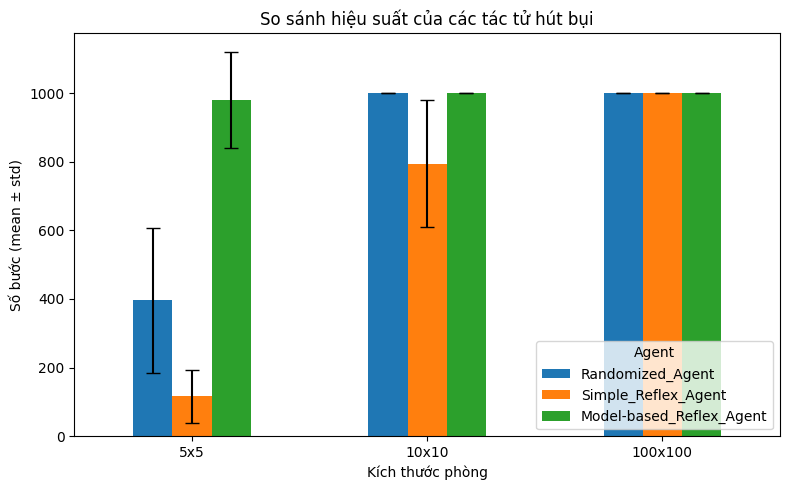

In [32]:
# Your graphs and discussion of the results goes here
def split_value(val):
    mean , std = val.split("±")
    return float(mean.strip()) , float(std.strip())

data = {}
for agent in ["Randomized_Agent" , "Simple_Reflex_Agent" , "Model-based_Reflex_Agent"]:
    means, stds = zip(*[split_value(v) for v in results[agent]])
    data[agent] = {"mean": means , "std": stds}

df_means = pd.DataFrame({agent: data[agent]["mean"] for agent in data} , index = results['Room_size'])
df_stds = pd.DataFrame({agent: data[agent]["std"] for agent in data} , index = results['Room_size'])

# Vẽ biểu đồ
ax = df_means.plot(kind="bar", yerr=df_stds, capsize=5, figsize=(8,5))
plt.title("So sánh hiệu suất của các tác tử hút bụi")
plt.ylabel("Số bước (mean ± std)")
plt.xlabel("Kích thước phòng")
plt.xticks(rotation=0)
plt.legend(title="Agent")
plt.tight_layout()
plt.show()

## Task 5: Robustness of the agent implementations [10 Points] 

Describe how **your agent implementations** will perform 

* if it is put into a rectangular room with unknown size, 
* if the cleaning area can have an irregular shape (e.g., a hallway connecting two rooms), or 
* if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).
* if the dirt sensor is not perfect and gives 10% of the time a wrong reading (clean when it is dirty or dirty when it is clean).
* if the bumper sensor is not perfect and 10% of the time does not report a wall when there is one.

In [35]:
# Answers goes here
"""
1. Rectangular room with unknown size (Phòng hình chữ nhật với kích thước không biết)

    - Randomized Agent: vẫn hoạt động được, vì nó chỉ di chuyển ngẫu nhiên và hút bụi khi gặp bụi. Tuy nhiên hiệu quả rất thấp, có thể tốn nhiều bước hoặc không bao giờ làm sạch toàn bộ.
    - Simple Reflex Agent: hoạt động tốt nếu quy tắc được thiết kế dựa trên bumper (cảm biến tường), vì tác tử có thể tránh va chạm và tiếp tục di chuyển. Nhưng nó không có khả năng “nhớ” nên dễ bỏ sót các khu vực.
    - Model-based Reflex Agent: hiệu quả hơn vì có mô hình nội bộ để đánh dấu các ô đã thăm. Nếu không biết kích thước ban đầu, agent có thể dần khám phá biên của phòng nhờ bumper và mở rộng bản đồ bên trong.

2. Irregular-shaped cleaning area (e.g., hallway connecting two rooms) (Khu vực dọn dẹp hình dạng không đều)

    - Randomized Agent: có thể tình cờ khám phá hết, nhưng mất rất nhiều thời gian và không đảm bảo.
    - Simple Reflex Agent: dễ bị mắc kẹt hoặc không quay lại các khu vực hẹp, vì không có trí nhớ.
    - Model-based Reflex Agent: có khả năng xây dựng bản đồ không gian đã thăm, nên sẽ tìm được đường quay lại và dọn sạch được cả khu vực hành lang hay các nhánh phòng phức tạp.

3. Room with obstacles (phòng với nhiều trở ngại)

    - Randomized Agent: chỉ phản ứng khi bumper báo tường hoặc vật cản, nên có thể bị kẹt ở một khu vực hẹp.
    - Simple Reflex Agent: sẽ tránh chướng ngại vật nhờ bumper, nhưng có thể đi vòng lại nhiều lần hoặc bỏ sót khu vực phía sau chướng ngại.
    - Model-based Reflex Agent: sẽ ghi nhận các ô không thể đi qua trong mô hình nội bộ, từ đó tìm đường vòng qua chướng ngại để đến các ô chưa dọn. Đây là tác tử phù hợp nhất cho môi trường có vật cản.

4. Imperfect dirt sensor (10% error) (Cảm biến bụi bẩn không hoàn hảo (lỗi 10%))

    - Randomized Agent: có thể hút nhầm nơi không bẩn hoặc bỏ sót bụi, làm giảm hiệu quả tổng thể.
    - Simple Reflex Agent: dễ bị ảnh hưởng vì không có cách nào xác minh lại; nếu cảm biến báo sai thì hành động cũng sai.
    - Model-based Reflex Agent: ít bị ảnh hưởng hơn, vì có thể lưu lại thông tin nhiều lần về tình trạng bụi ở một ô. Nếu gặp bất nhất (lúc báo bẩn, lúc báo sạch), agent có thể kiểm chứng lại bằng cách quay lại ô đó.

5. Imperfect bumper sensor (10% error) (Cảm biến cản không hoàn hảo (lỗi 10%))

    - Randomized Agent: có nguy cơ thử đi xuyên qua tường hoặc chướng ngại vật khi bumper báo sai, dẫn đến trạng thái “kẹt” hoặc lặp vô hạn.
    - Simple Reflex Agent: cũng gặp vấn đề tương tự, vì phản ứng hoàn toàn phụ thuộc vào cảm biến. Nếu bumper bỏ sót tường, agent sẽ đưa ra hành động không hợp lệ.
    - Model-based Reflex Agent: có thể bền vững hơn nhờ “nhớ” vị trí tường đã gặp trước đó. Nếu một lần cảm biến báo sai, thông tin từ những lần quan sát khác sẽ giúp giảm tác động của lỗi.
"""

'\n1. Rectangular room with unknown size (Phòng hình chữ nhật với kích thước không biết)\n\n    - Randomized Agent: vẫn hoạt động được, vì nó chỉ di chuyển ngẫu nhiên và hút bụi khi gặp bụi. Tuy nhiên hiệu quả rất thấp, có thể tốn nhiều bước hoặc không bao giờ làm sạch toàn bộ.\n    - Simple Reflex Agent: hoạt động tốt nếu quy tắc được thiết kế dựa trên bumper (cảm biến tường), vì tác tử có thể tránh va chạm và tiếp tục di chuyển. Nhưng nó không có khả năng “nhớ” nên dễ bỏ sót các khu vực.\n    - Model-based Reflex Agent: hiệu quả hơn vì có mô hình nội bộ để đánh dấu các ô đã thăm. Nếu không biết kích thước ban đầu, agent có thể dần khám phá biên của phòng nhờ bumper và mở rộng bản đồ bên trong.\n\n2. Irregular-shaped cleaning area (e.g., hallway connecting two rooms) (Khu vực dọn dẹp hình dạng không đều)\n\n    - Randomized Agent: có thể tình cờ khám phá hết, nhưng mất rất nhiều thời gian và không đảm bảo.\n    - Simple Reflex Agent: dễ bị mắc kẹt hoặc không quay lại các khu vực hẹp, 

## Advanced task: Imperfect Dirt Sensor

* __Graduate students__ need to complete this task [10 points]
* __Undergraduate students__ can attempt this as a bonus task [max +5 bonus points].

1. Change your simulation environment to run experiments for the following problem: The dirt sensor has a 10% chance of giving the wrong reading. Perform experiments to observe how this changes the performance of the three implementations. Your model-based reflex agent is likely not able to clean the whole room, so you need to measure performance differently as a tradeoff between energy cost and number of uncleaned squares. 

2. Design an implement a solution for your model-based agent that will clean better. Show the improvement with experiments.

## More Advanced Implementation (not for credit)

If the assignment was to easy for yuo then you can think about the following problems. These problems are challenging and not part of this assignment. We will learn implementation strategies and algorithms useful for these tasks during the rest of the semester.

* __Obstacles:__ Change your simulation environment to run experiments for the following problem: Add random obstacle squares that also trigger the bumper sensor. The agent does not know where the obstacles are. Perform experiments to observe how this changes the performance of the three implementations. Describe what would need to be done to perform better with obstacles. Add code if you can. 

* __Agent for and environment with obstacles:__ Implement an agent for an environment where the agent does not know how large the environment is (we assume it is rectangular), where it starts or where the obstacles are. An option would be to always move to the closest unchecked/uncleaned square (note that this is actually depth-first search).

* __Utility-based agent:__ Change the environment for a $5 \times 5$ room, so each square has a fixed probability of getting dirty again. For the implementation, we give the environment a 2-dimensional array of probabilities. The utility of a state is defined as the number of currently clean squares in the room. Implement a utility-based agent that maximizes the expected utility over one full charge which lasts for 100000 time steps. To do this, the agent needs to learn the probabilities with which different squares get dirty again. This is very tricky!

In [ ]:
# Your ideas/code